## Computational Homework 2

In this assignment, we work through two examples of fitting multiple linear regression models. These will be used two illustrate two important points:

1. Issues that arise with the $R^2$ measure when adding spurious predictors to the model, and how these can be mitigated by considering the adjusted $R^2$ instead.
2. What happens when we include linearly dependent features in a multiple regression model.

As usual, you will likely find the notebooks on the [online book](https://rythei.github.io/linear-models/overview.html) useful, especially if you don't have much prior experience using python.

For this assignment, you will need to download the dataset `qsar_fish_toxicity.csv` dataset from [this link](https://drive.google.com/drive/folders/1OkXMcFo0urN0kSQYH4d75I4V3pnSpV6H?usp=sharing). Once you've downloaded the `.csv` file, store it in the same directory as this notebook. Then you will be able to load the dataset into python using the following code. 

The `qsar_fish_toxicity` dataset contains data about $n=908$ molecules (i.e. potential drugs), quantified using 6 molecular descriptors. The response is a measure of how toxic the drug is for a particular fish species, which we hope to predict based on the molecular features. The idea is that, if we have a new drug, we would like to be able to predict a priori whether it will be toxic without having to administer it. Details about the dataset (if you are curious) can be found [here](https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity#).

Let's first read in the dataset using `pandas`.

In [24]:
import pandas as pd

dataset = pd.read_csv("qsar_fish_toxicity.csv")
dataset.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


For convenience, we can read in the data into numpy arrays `X` and `y` with the following code:

In [25]:
X = dataset[[c for c in dataset.columns if c!= "LC50"]].to_numpy()
y = dataset["LC50"].to_numpy()
print(X.shape, y.shape)

(908, 6) (908,)


Finally, we will append a column of 1's to the data matrix `X` so that we can have an intercept term in the regression model.

In [26]:
import numpy as np

ones = np.ones(X.shape[0]).reshape(-1,1)
X = np.hstack([ones, X])
print(X.shape)
X

(908, 7)


array([[1.   , 3.26 , 0.829, ..., 0.   , 1.   , 1.453],
       [1.   , 2.189, 0.58 , ..., 0.   , 0.   , 1.348],
       [1.   , 2.125, 0.638, ..., 0.   , 0.   , 1.348],
       ...,
       [1.   , 3.763, 0.916, ..., 0.   , 6.   , 2.918],
       [1.   , 2.831, 1.393, ..., 0.   , 1.   , 0.906],
       [1.   , 4.057, 1.032, ..., 1.   , 3.   , 4.754]])

**Problem 1.** Define a function `fit_linear_regression(X, y)` which takes in an a data matrix $X$ and a vector of responses $y$ and returns the least squares solution $\hat{\beta} = (X^\top X)^{-1}X^\top y$. (Hint: you will probably want to use the `numpy` function `np.linalg.inv` to compute the inverse of a matrix).

In [27]:
def fit_linear_regression(X,y):
    return np.dot(np.linalg.inv(X.T@X), np.dot(X.T, y))

**Problem 2.** Fit a linear regression model using the fix toxicity data to find the least squares parameters $\hat{\beta}$. Using your fitted model, compute the fitted values $\hat{y} = X\hat{\beta}$, and use these to make a scatter plot of the fitted values $\hat{y}$ versus the true values $y$, and compute the $R^2$ for the regression model. Interpret what this $R^2$ means.

In [28]:
beta_hat = fit_linear_regression(X, y)
y_hat = np.dot(X, beta_hat)

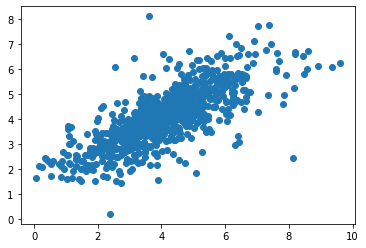

In [29]:
import matplotlib.pyplot as plt

plt.scatter(y, y_hat)
plt.show()

In [30]:
RSS = np.sum((y-y_hat)**2)
TSS = np.sum((y-np.mean(y))**2)
RegSS = TSS-RSS
R2 = RegSS/TSS
R2

0.5771635677620811

**Problem 3.** In this problem, we're going to see what happens to the $R^2$ values when we add completely non-informative features to our dataset. To do this, we will draw new columns at random from a normal distribution, and fit new regression models using them. Since these features are completely uncorrelated with the response, we don't expect that these will actually improve the model.

Below we give you some template code for adding these spurious features to the data matrix `X`. With this code, at each step, fit a linear regression model using the given feature matrix `X`. Use this model to compute the fitted values $\hat{y}$, and compute the corresponding $R^2$ value. Store these values at each step, and at the end plot the $R^2$ values versus the number of spurious features added.

What happens to the $R^2$ values as we add more spurious features?

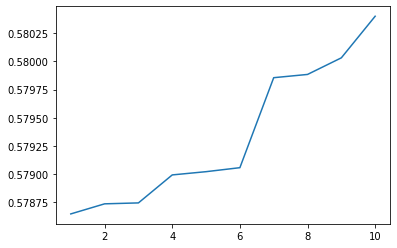

In [39]:
## in this plot, the R2 goes up when we add completely random features uncorrelated with the response Y

np.random.seed(0) # set random state so that we always get the same result
X_copy = X.copy() # create a copy of the X array so we don't overwrite the original one
R2_values = []

for k in range(1,11):
    x_random = np.random.normal(size=(X.shape[0],1)) # generate a random feature column from a normal distribution
    X_copy = np.hstack([X_copy, x_random]) # add the random feature to the data matrix
    
    beta_hat = fit_linear_regression(X_copy, y)
    
    y_hat = np.dot(X_copy, beta_hat)
    RSS = np.sum((y-y_hat)**2)
    TSS = np.sum((y-np.mean(y))**2)
    RegSS = TSS-RSS
    R2 = RegSS/TSS
    R2_values.append(R2)
    

plt.plot(range(1,11), R2_values)
plt.show()

**Problem 4.** In the previous part, you should have seen that the $R^2$ increases when we add more features, even if they are completely uncorrelated with the response $y$. This is an undesireable property of the $R^2$: it is a non-decreasing function of the number of features. This means that we need to be careful using it to select which model is best, since it will always make it seem like a model with more features is better.

The _adjusted $R^2$_ is a measure closely related to the usual $R^2$ which helps resolves this issue. It is defined as follows: given the usual $R^2$ value, the adjusted $R^2$ value, denote $R^2_{adj}$ is given by 

$$
R^2_{adj} = 1-(1-R^2)\frac{n-1}{n-p}
$$

where $n$ is the number of samples and $p$ is the number of features used in the model. Repeat the steps in problem 3, but instead using the adjusted $R^2$ value. What do you notice now?

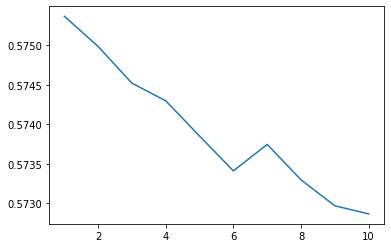

In [38]:
## the adjusted R2 no longer strictly goes up when we add more features, and now the best model by this metric 
## is the one with the fewest spurious features


np.random.seed(0) # set random state so that we always get the same result
X_copy = X.copy() # create a copy of the X array so we don't overwrite the original one
R2_values = []

for k in range(1,11):
    x_random = np.random.normal(size=(X.shape[0],1)) # generate a random feature column from a normal distribution
    X_copy = np.hstack([X_copy, x_random]) # add the random feature to the data matrix
    
    beta_hat = fit_linear_regression(X_copy, y)
    y_hat = np.dot(X_copy, beta_hat)
    RSS = np.sum((y-y_hat)**2)
    TSS = np.sum((y-np.mean(y))**2)
    RegSS = TSS-RSS
    R2 = RegSS/TSS
    R2_adj = 1-(1-R2)*(X.shape[0]-1)/(X.shape[0] - (X.shape[1] + k))
    R2_values.append(R2_adj)
    
plt.plot(range(1,11), R2_values)
plt.show()